# Hola Mario! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Mario. Tu notebook tiene todo el desarrollo necesario, pero hay varias modificaciones y correcciones que debes hacer. Te dejé indicaciones, revísalas y realiza las modificaciones necesarias.
    
Recuerda mantener los comentarios de revisiones anteriores, así se puede hacer un seguimiento de las partes a mejorar.    
    
Saludos!    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien Mario, veo que se agregaron correcciones para la parte de los modelos. Sin embargo, tengo un comentario respecto a los valores que probaste para depth, revísalo. Por otro lado, aún falta que elimines los outliers para la data que usan los modelos, puedes usar la misma función que creaste que remueve los outliers según el rango intercuartil.
    
Saludos!    

</div>

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Hola Mario! Te dejé un comentario para que arregles la parte de los outliers.
    
Saludos!    

</div>

## Resumen de la revisión 5 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v5</b> <a class="tocSkip"></a>

Bien hecho Mario, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Descripción del Proyecto

El mineral extraído se somete a un tratamiento primario para obtener la mezcla de mineral, o alimentación rougher, que es la materia prima utilizada para la flotación (también conocida como proceso rougher). Después de la flotación, el material se somete al proceso de purificación en dos etapas.

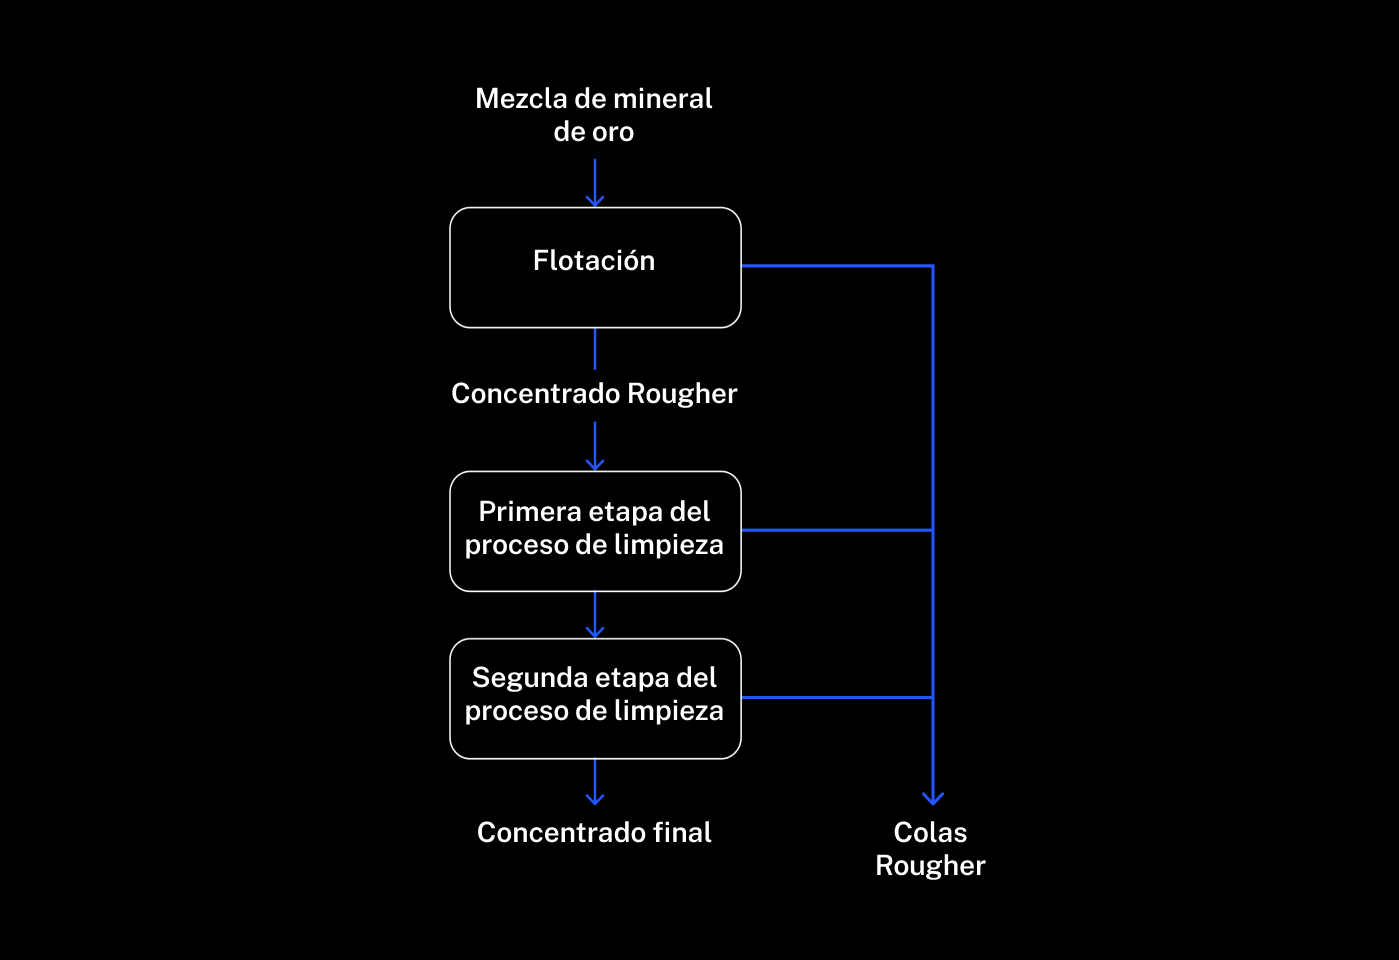

Este proyecto tiene como fin analizar y crear un modelo de datos que sea capaz de predecir la tasa de recuperacion del oro prinipalmente, asi comot ambien de los demas quimicos usados en el proceso de extraccion. todo esto debe realizarse mediante el calculo de la recuperacion:

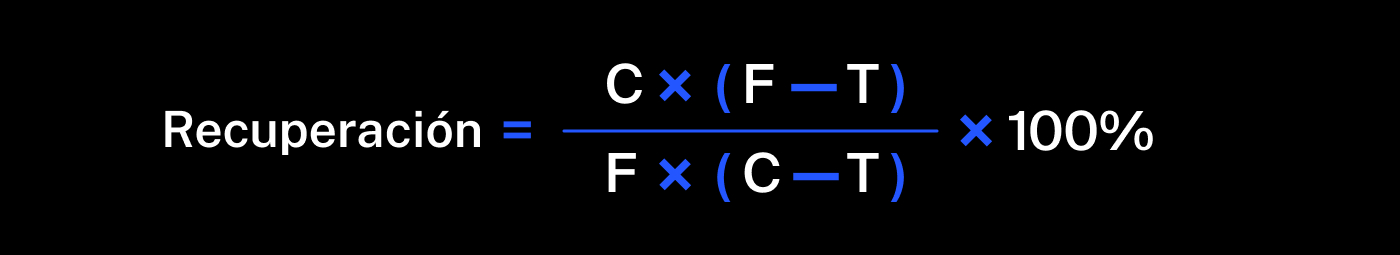

Para predecir el coeficiente, hay que encontrar la proporción de oro en el concentrado y en las colas. Ten en cuenta que tanto el concentrado final como el concentrado rougher tienen importancia.

*Métricas de evaluación*

Para resolver el problema, necesitaremos una nueva métrica. Se llama sMAPE, o error medio absoluto porcentual simétrico.

Es similar al MAE, pero se expresa en valores relativos en lugar de absolutos. ¿Por qué es simétrico? Porque tiene en cuenta la escala tanto del objetivo como de la predicción.

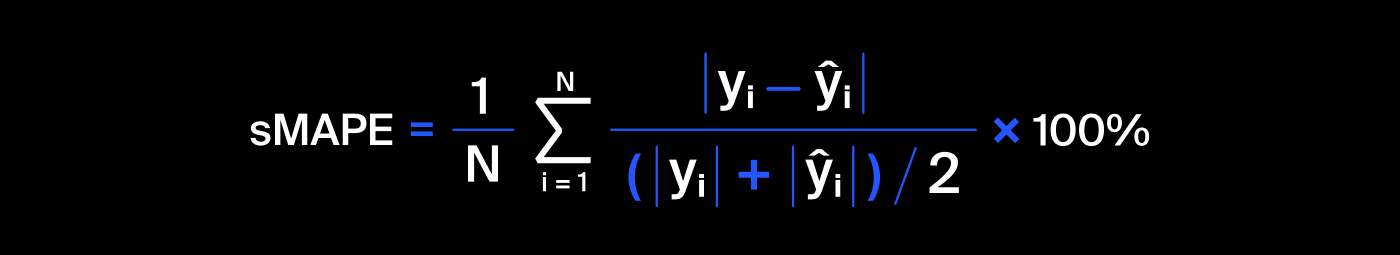
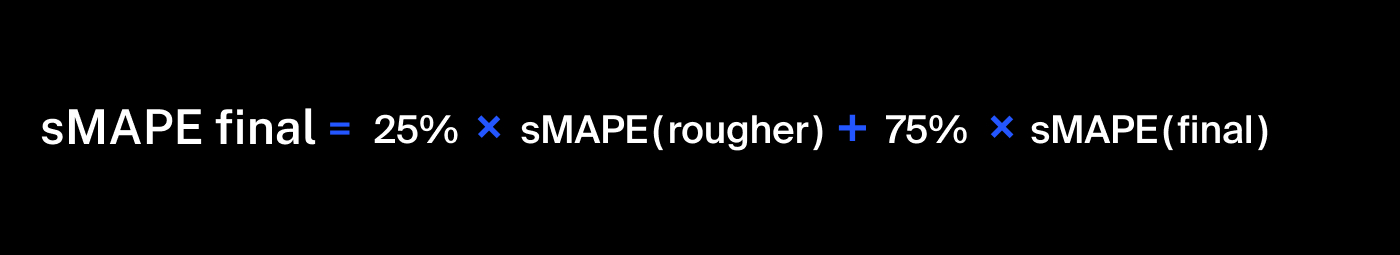




**Preparacion de datos**

En la preparacion de la data, procedo a realizar una verificacion exploratoria de los datasets compartidos, asi como tambien el importe de las liberias necesarias para porder trabajar la informacion. 

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Cargar datos para las tres regiones
#ruta = 'C:/Users/USUARIO/Documents/Tripleten_springs/Spring12/'
ruta = '/datasets/'
df_test = pd.read_csv(ruta + 'gold_recovery_test.csv')
df_train = pd.read_csv(ruta + 'gold_recovery_train.csv')
df_full = pd.read_csv(ruta + 'gold_recovery_full.csv')


**Validacion de datasets**

In [3]:
print("test")
display(df_test.sample(5))
print(df_test.info())


test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2020,2016-11-24 04:59:59,201.014615,6.011192,7.38,1.850413,1597.372478,-499.752489,1602.545719,-500.517308,1603.817193,...,18.024869,-500.493875,15.963563,-499.298966,19.181817,-502.536244,11.990008,-500.001401,21.954663,-501.644508
2688,2016-12-22 00:59:59,147.932103,13.918723,7.73,0.895040,1401.764222,-500.372174,1403.248965,-501.327108,1399.139023,...,14.993737,-498.618163,12.983658,-495.540226,14.601939,-499.711700,10.030977,-499.809926,19.000343,-499.134193
5198,2017-12-04 14:59:59,6.070796,0.502275,7.52,0.062861,1548.093857,-498.398504,1549.856253,-491.973430,1549.540521,...,16.970806,-487.067605,14.919736,-489.287678,10.993745,-497.096898,9.013381,-494.659253,18.014525,-503.027710
794,2016-10-04 02:59:59,149.132084,4.497485,7.69,0.710294,1602.441545,-499.322949,1601.838947,-500.421326,1603.344481,...,13.992320,-518.153644,13.092206,-499.926186,11.070342,-498.875156,8.048546,-500.450094,22.995548,-499.616524
5211,2017-12-05 03:59:59,183.148282,8.965421,7.98,1.589062,1547.790296,-493.867768,1549.019927,-513.210612,1551.199156,...,17.033695,-498.494142,14.963433,-146.712554,10.942100,-497.424468,9.036390,-497.707084,17.989350,-497.288159


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [4]:
print("Train")
display(df_train.sample(5))
print(df_train.info())
print(df_train.duplicated().sum())

Train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12730,2018-02-27 09:59:59,5.284515,9.534763,9.552936,45.838832,71.459851,13.884846,4.151595,8.874533,4.130828,...,19.979933,-499.189966,15.071474,-499.716543,14.992641,-499.506466,12.024236,-503.161335,11.011452,-499.164389
15651,2018-06-29 02:59:59,5.609294,8.032747,8.552278,45.825971,80.047912,10.300337,1.318013,11.139937,2.251439,...,29.993191,-498.784834,22.922600,-499.682366,20.005238,-498.981296,14.997177,-499.667438,17.993326,-499.990991
8385,2017-04-30 08:59:59,4.395486,11.247270,10.308162,44.888966,58.308364,8.383921,3.181242,11.410697,3.504411,...,24.979920,-402.370913,23.002086,-401.353061,26.005938,-451.971267,23.954053,-450.250667,29.995580,-503.987030
10788,2017-08-08 11:59:59,4.130878,11.716362,7.257324,45.107002,72.628295,4.073475,1.800804,6.925121,1.225245,...,18.028506,-501.681464,12.142948,-401.182784,16.034080,-500.803464,11.992544,-499.976666,14.999764,-500.399812
11203,2017-08-25 18:59:59,4.084535,11.915723,8.430258,45.026868,73.441444,6.526712,2.857028,12.791704,2.042547,...,14.516632,-499.272101,10.944173,-399.049953,13.973625,-500.279717,11.036358,-499.979569,15.017089,-499.731839


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
print("Full")
display(df_full.sample(5))
print(df_full.info())

Full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
9285,2017-02-04 20:59:59,6.589811,11.624135,14.711345,43.122383,72.391741,10.228120,3.806904,7.954395,3.321312,...,24.958291,-500.867592,22.896141,-500.015276,22.975391,-500.344394,20.004196,-499.931916,25.008397,-599.847745
21021,2018-06-08 20:59:59,3.987141,13.139677,6.237953,43.986191,70.490526,8.632501,3.097118,8.116392,2.006227,...,30.056572,-498.813274,22.023129,-499.256386,24.978430,-498.565651,22.979673,-499.866470,24.991174,-498.708527
6451,2016-10-09 18:59:59,9.975558,8.822670,11.276140,37.381229,71.706166,10.913544,2.767152,9.472355,3.931505,...,12.000766,-500.378029,11.909687,-497.687620,9.052918,-502.675891,7.051946,-500.065122,18.968555,-500.835767
1779,2016-03-29 03:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,11.993379,-498.794830,12.018654,-500.178452,11.925546,-497.955600,10.018203,-499.203369,19.996584,-505.946467
2130,2016-04-12 18:00:00,7.155073,10.664840,8.289839,40.913331,66.217560,7.571007,2.081291,11.076339,2.574891,...,15.042636,-502.051891,12.077739,-350.091988,18.995641,-500.317115,19.018573,-500.102036,29.897261,-500.503378


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


## 1.2. Comprueba que el cálculo de la recuperación sea correcto:

mediante la formula *recovery_cal* realizare el calculo de el % de recuperacion, una vez calculado usando la formula realizare el calculo del error medio absoluto para poder ocmprobar que el desarrollo de la formula esta correcto.


In [6]:
# Verificacion el cálculo de rougher.output.recovery

#C = df_train['rougher.output.concentrate_au']
#F = df_train['rougher.input.feed_au']
#T = df_train['rougher.output.tail_au']

def recovery_cal(df, stage = 'rougher'):
    
    if stage == 'rougher':
        C = df['rougher.output.concentrate_au']
        F = df['rougher.input.feed_au']
        T = df['rougher.output.tail_au']
        
    elif stage == 'final':
        C = df['final.output.concentrate_au']
        F = df['rougher.output.concentrate_au']
        T = df['final.output.tail_au']
    
    else:
        print('la etapa escrita no es correcta')
        return np.nan
    
    num = C*(F-T)
    denom = F*(C-T)
    recovery = num/denom*100
    
    return recovery


In [7]:
rougher_data = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']].dropna()

rougher_recovery = recovery_cal(rougher_data, 'rougher')

In [8]:
display(rougher_recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [9]:
mean_absolute_error(rougher_recovery, rougher_data['rougher.output.recovery'])

9.303415616264301e-15

**Analisis:**

el error absoluto medio tiene un valor muy bajo es casi despreciable, lo que significa que el calculo del recovery fue apropiado. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcta la comprobación del fórmula, vemos que es muy precisa.

</div>

## Características no disponibles


In [10]:
columns_full = df_full.columns.values
columns_test = df_test.columns.values

missed_cols = set(columns_full) - set(columns_test)
missed_cols

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

## 1.4 Procesamiento de datos

In [11]:
print(df_train.duplicated().sum())
print()
display(df_train.isna().sum())

0



date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [12]:
print(df_test.duplicated().sum())
print()
display(df_test.isna().sum())

0



date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [13]:
# rellenado de valores nan

df_train = df_train.sort_values(by='date')
df_train = df_train.ffill()

df_test = df_test.sort_values(by='date')
df_test = df_test.ffill()

display(df_train.isna().sum())
display(df_test.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, efectivamente, podemos aprovechar que la data son series de tiempo y que no deberían experimentar una variación enorme entre observaciones.

</div>

In [14]:
print(df_test.shape)
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')
print(df_test.shape)

(5856, 53)
(5856, 55)


In [15]:
df_train = df_train[df_test.columns]

**Analisis:**

mediante el rellenado de celdas vacias, logramos evitar que el dataset contenga ruidos en la informacion presentada y por el contrario le sea de mayor utilidad a la organizacion.

## 2. Analisis los datos

usando el df_full procedo a realizar el analisis de los metales en la solucion quimica.



In [16]:
# Filtrado de outliers usando IQR
cols = ['date',  'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au','rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',  'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']

df_wo_outlinerss = df_full[cols]

def remove_outliers_iqr(df):
    clean_df = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns 
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

df_full = remove_outliers_iqr(df_wo_outlinerss)

<div class="alert alert-block alert-info">
<b>

# **AYUDA**

he intentado varias veces buscando la forma de quitar los outliners pero aun no encuentro la forma para poder hacerlo ya que al aplicar la formula el formato del campo fecha no me permite hacerlo y me genera error, puede spor favor explicarme que dbeo hacer para poder plasmarlo y enviar el examen por favor. 

</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

No debes remover outliers en base a la columna date. Los valores que debes revisar son los de las columnas que contienen valores numéricos. En esos casos, los valores que son muy extremos (muy pequeños o muy grandes) pueden ser considerados como outliers. En el caso de las fechas, no es necesario revisar esto.

</div>

<div class="alert alert-block alert-info">


**Corregido**

mediante el uso de la funcion **df.select_dtypes(include='number').columns** seleccione solo las columans con formato nuemrico, lo que me permitio aplicar la formula creada al dataset full y poder remover todos los valores atipicos, con lo cual ya todas lasgraficas y estimaciones siguiente se corrigieron y son mas precisas.  
<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v5</b> <a class="tocSkip"></a>

Bien hecho, efectivamente puedes seleccionar por tipo o simplemente no incluirla en el listado de columnas `cols`

</div>

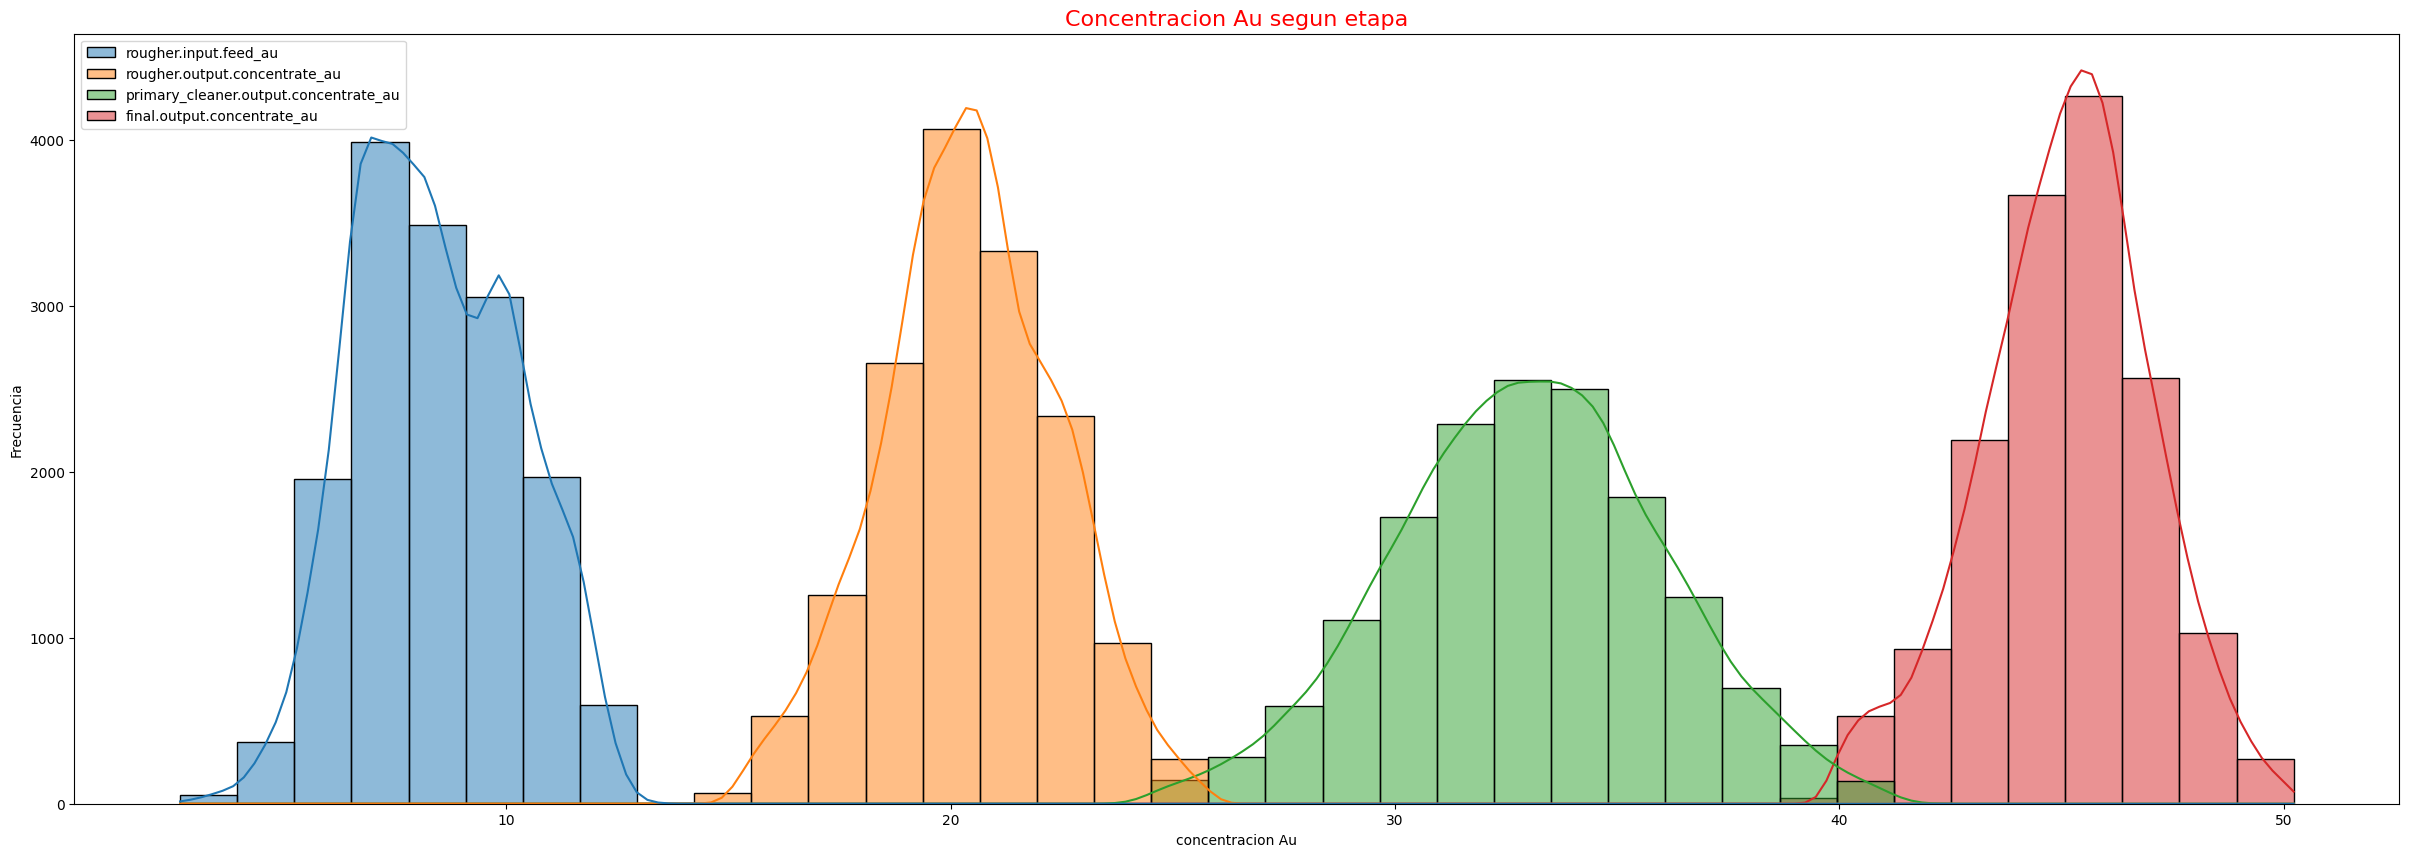

In [17]:
#Concentracion de Au
df_full = df_full.sort_values(by='date')
ag_col = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
concentrate_au = df_full[ag_col]

concentrate_au_clean = remove_outliers_iqr(concentrate_au)

plt.figure(figsize = (30,10))
sns.histplot(concentrate_au_clean, kde=True)
plt.xlabel('concentracion Au')
plt.ylabel('Frecuencia')
plt.title('Concentracion Au segun etapa', fontsize= 16, color= 'Red')
plt.show()


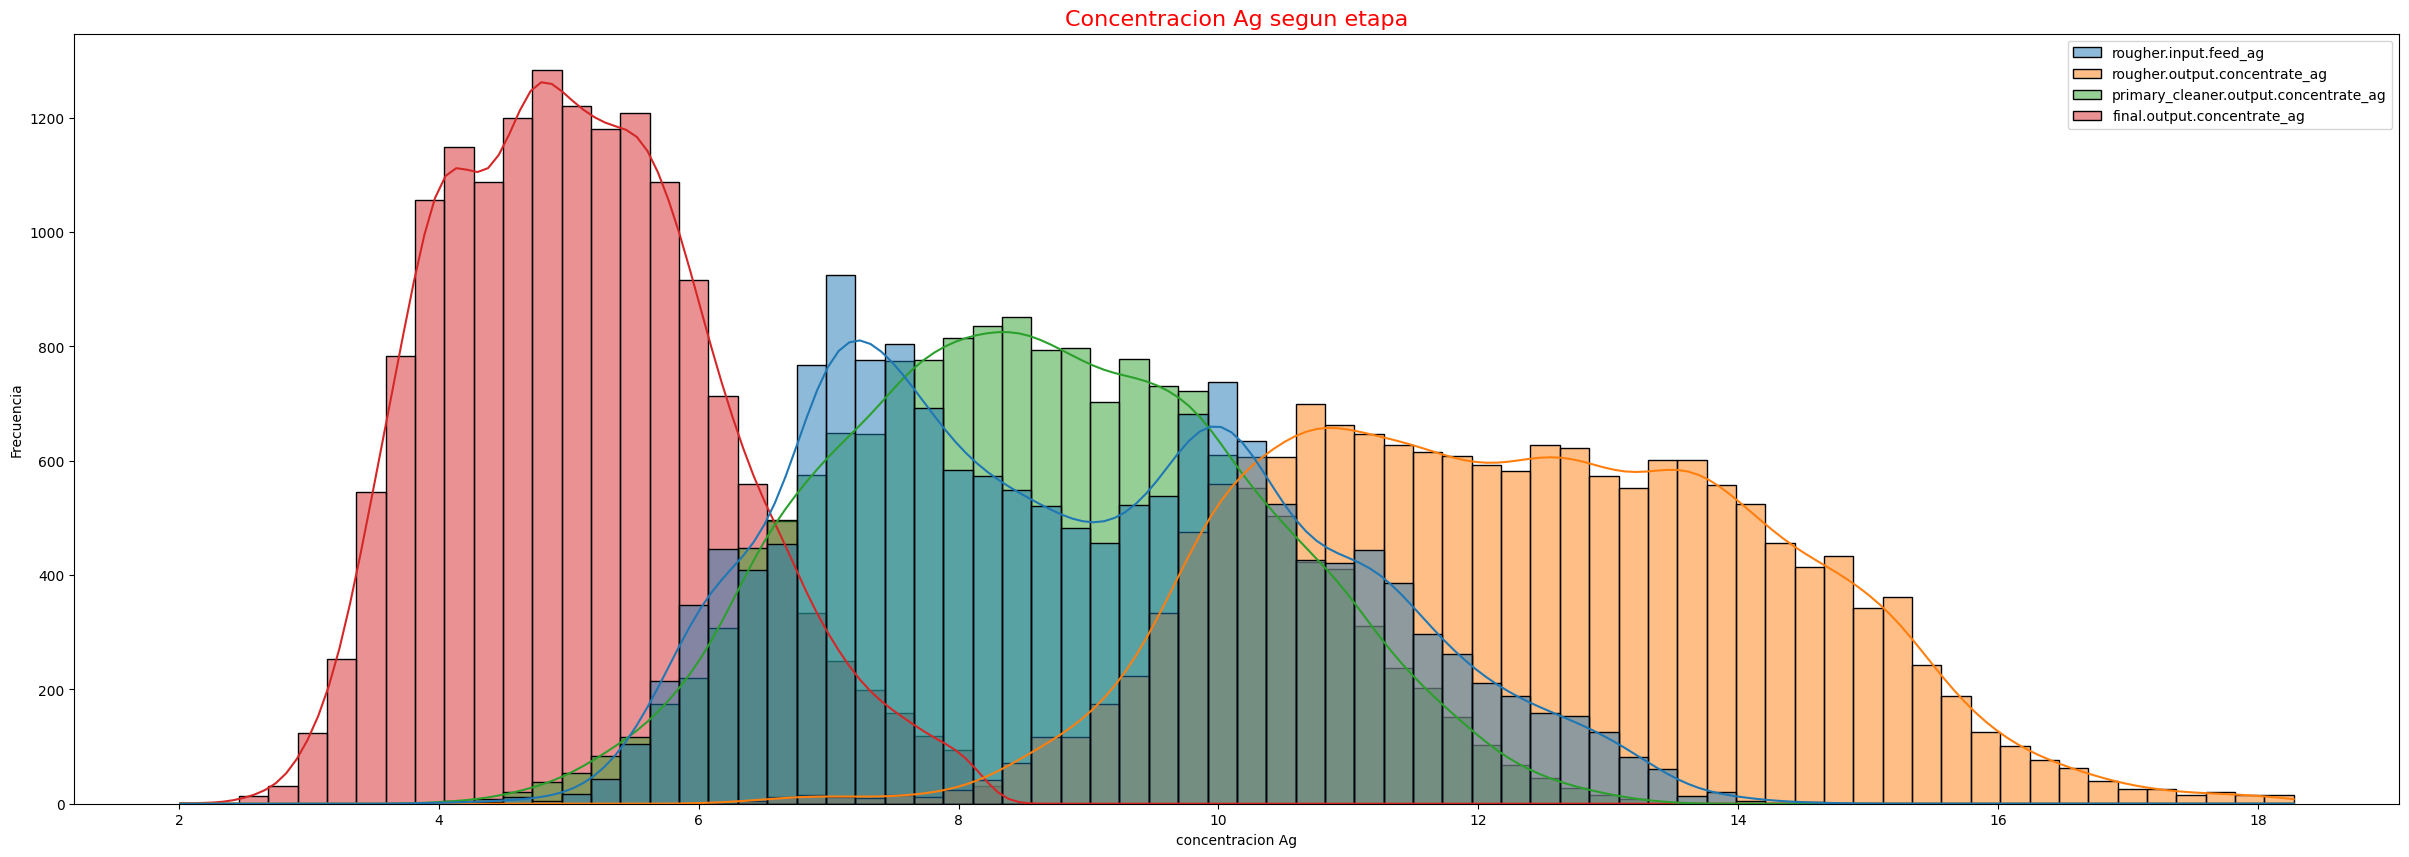

In [18]:
#Concentracion de Ag
ag_col = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
concentrate_ag = df_full[ag_col]
concentrate_ag_clean = remove_outliers_iqr(concentrate_ag)

plt.figure(figsize = (30,10))
sns.histplot(concentrate_ag_clean, kde=True)
plt.xlabel('concentracion Ag')
plt.ylabel('Frecuencia')
plt.title('Concentracion Ag segun etapa', fontsize= 16, color= 'Red')
plt.show()

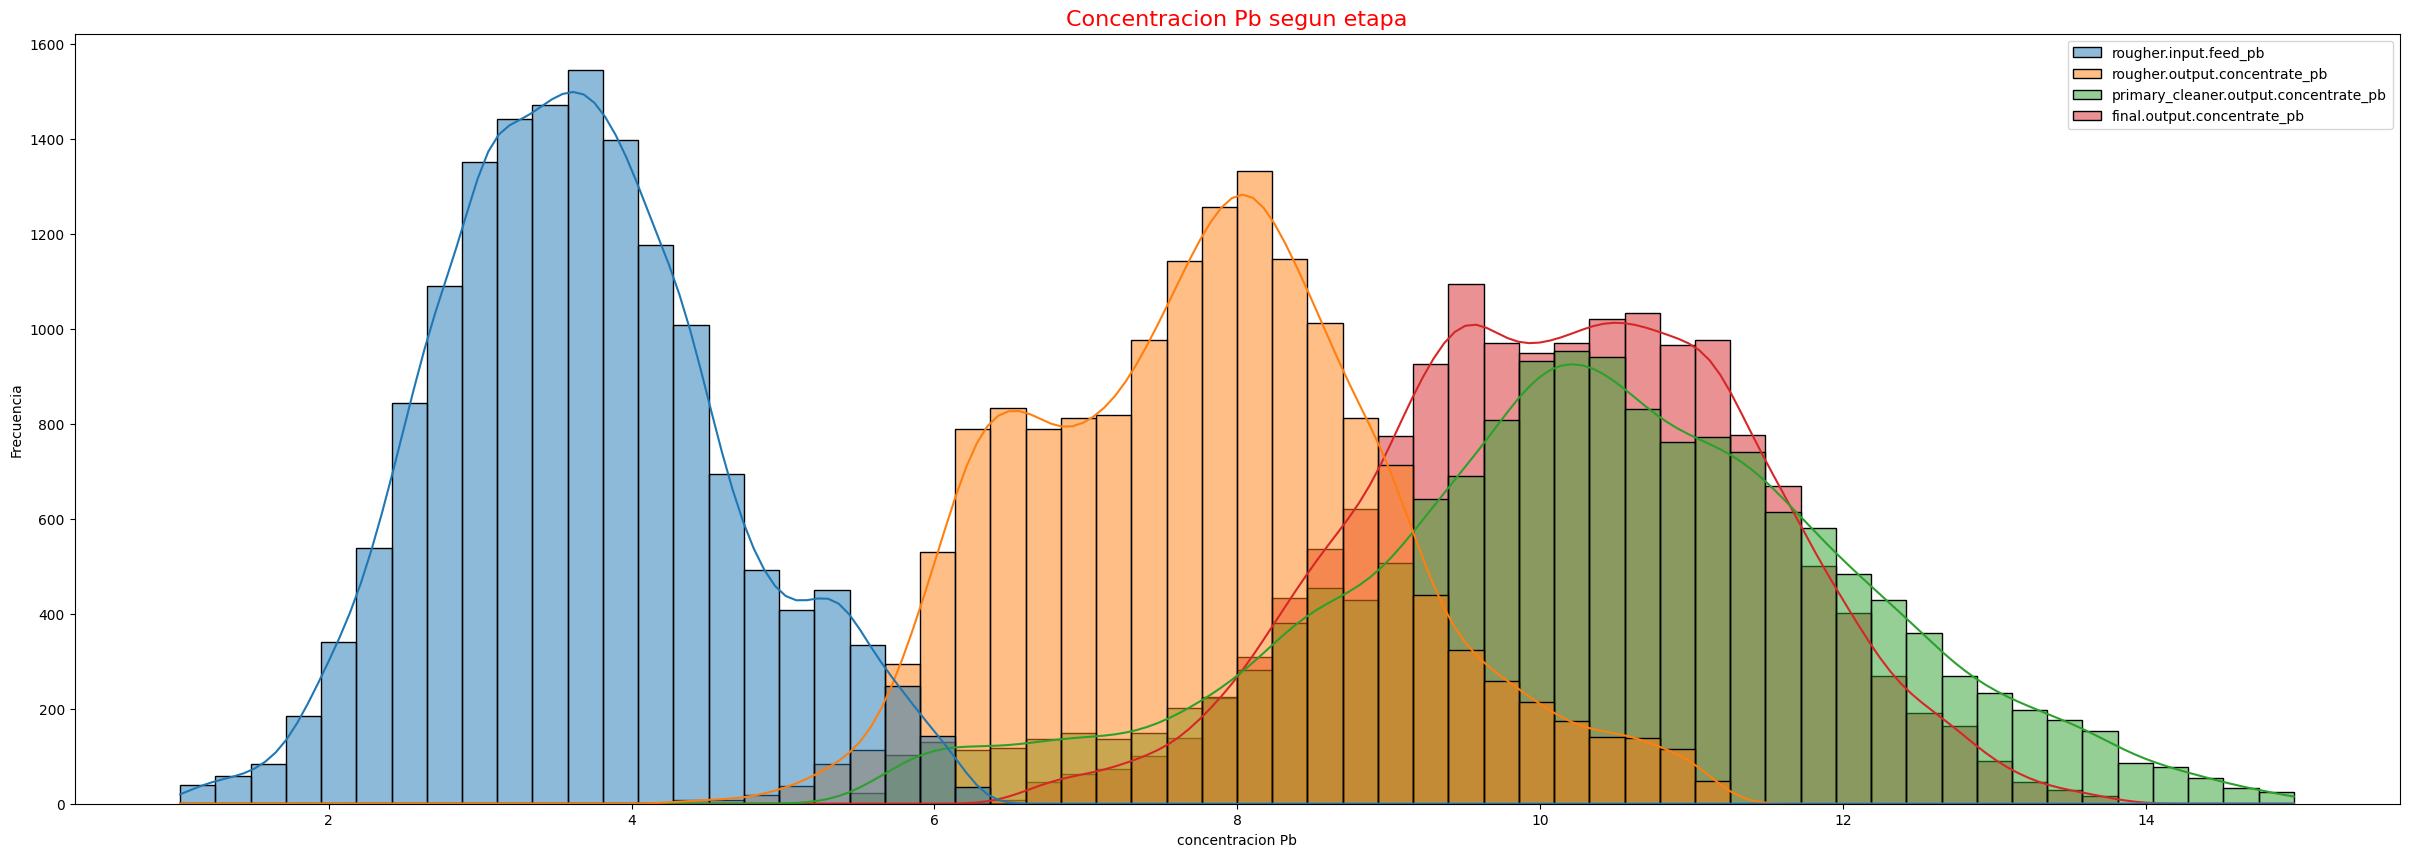

In [19]:
#Concentracion de Pb
ag_col = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
concentrate_pb = df_full[ag_col]
concentrate_pb_clean = remove_outliers_iqr(concentrate_pb)

plt.figure(figsize = (30,10))
sns.histplot(concentrate_pb_clean, kde=True)
plt.xlabel('concentracion Pb')
plt.ylabel('Frecuencia')
plt.title('Concentracion Pb segun etapa', fontsize= 16, color= 'Red')
plt.show()

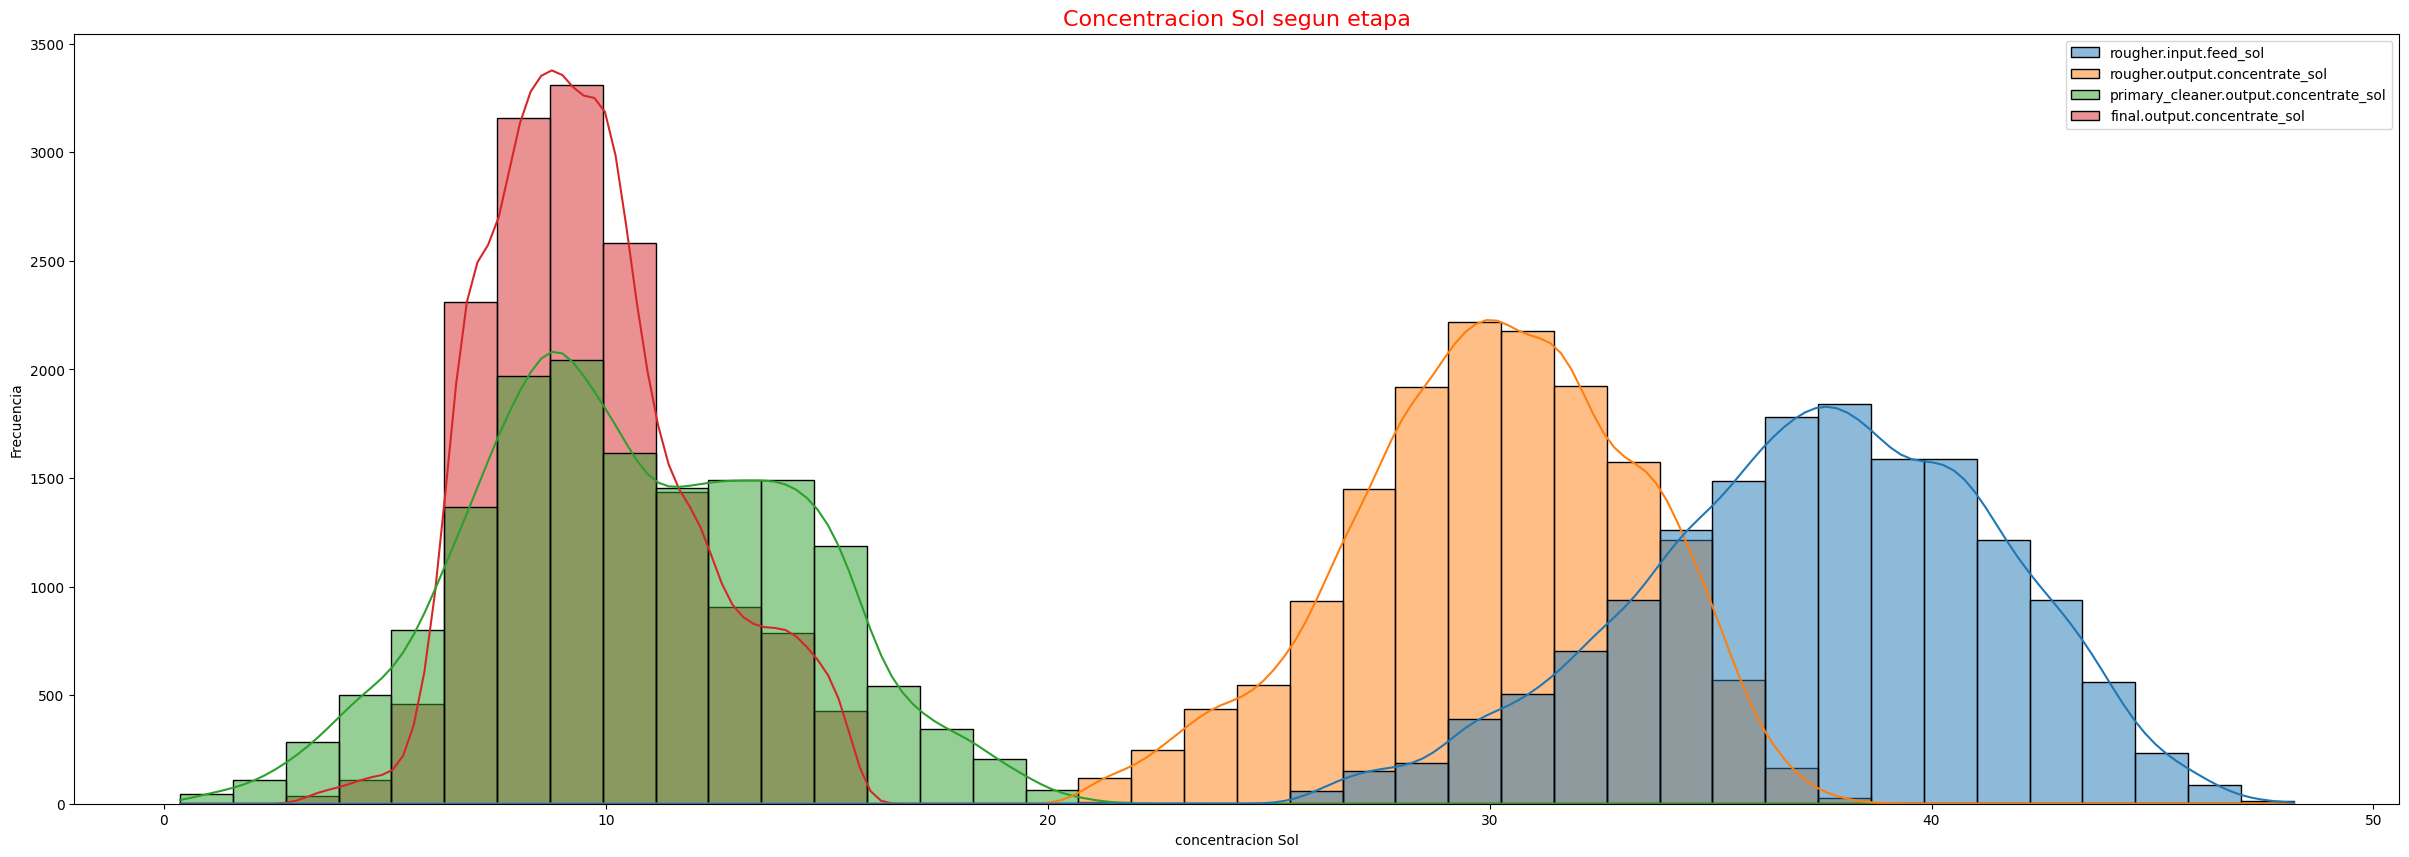

In [20]:
#Concentracion de Sol
ag_col = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']
concentrate_sol = df_full[ag_col]
concentrate_sol_clean = remove_outliers_iqr(concentrate_sol)

plt.figure(figsize = (30,10))
sns.histplot(concentrate_sol_clean, kde=True)
plt.xlabel('concentracion Sol')
plt.ylabel('Frecuencia')
plt.title('Concentracion Sol segun etapa', fontsize= 16, color= 'Red')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, podemos apreciar claramente como los procesos realizados aumentan la concentración del oro, mientras que los otros metales experimentan bajas o variaciones menores.

</div>

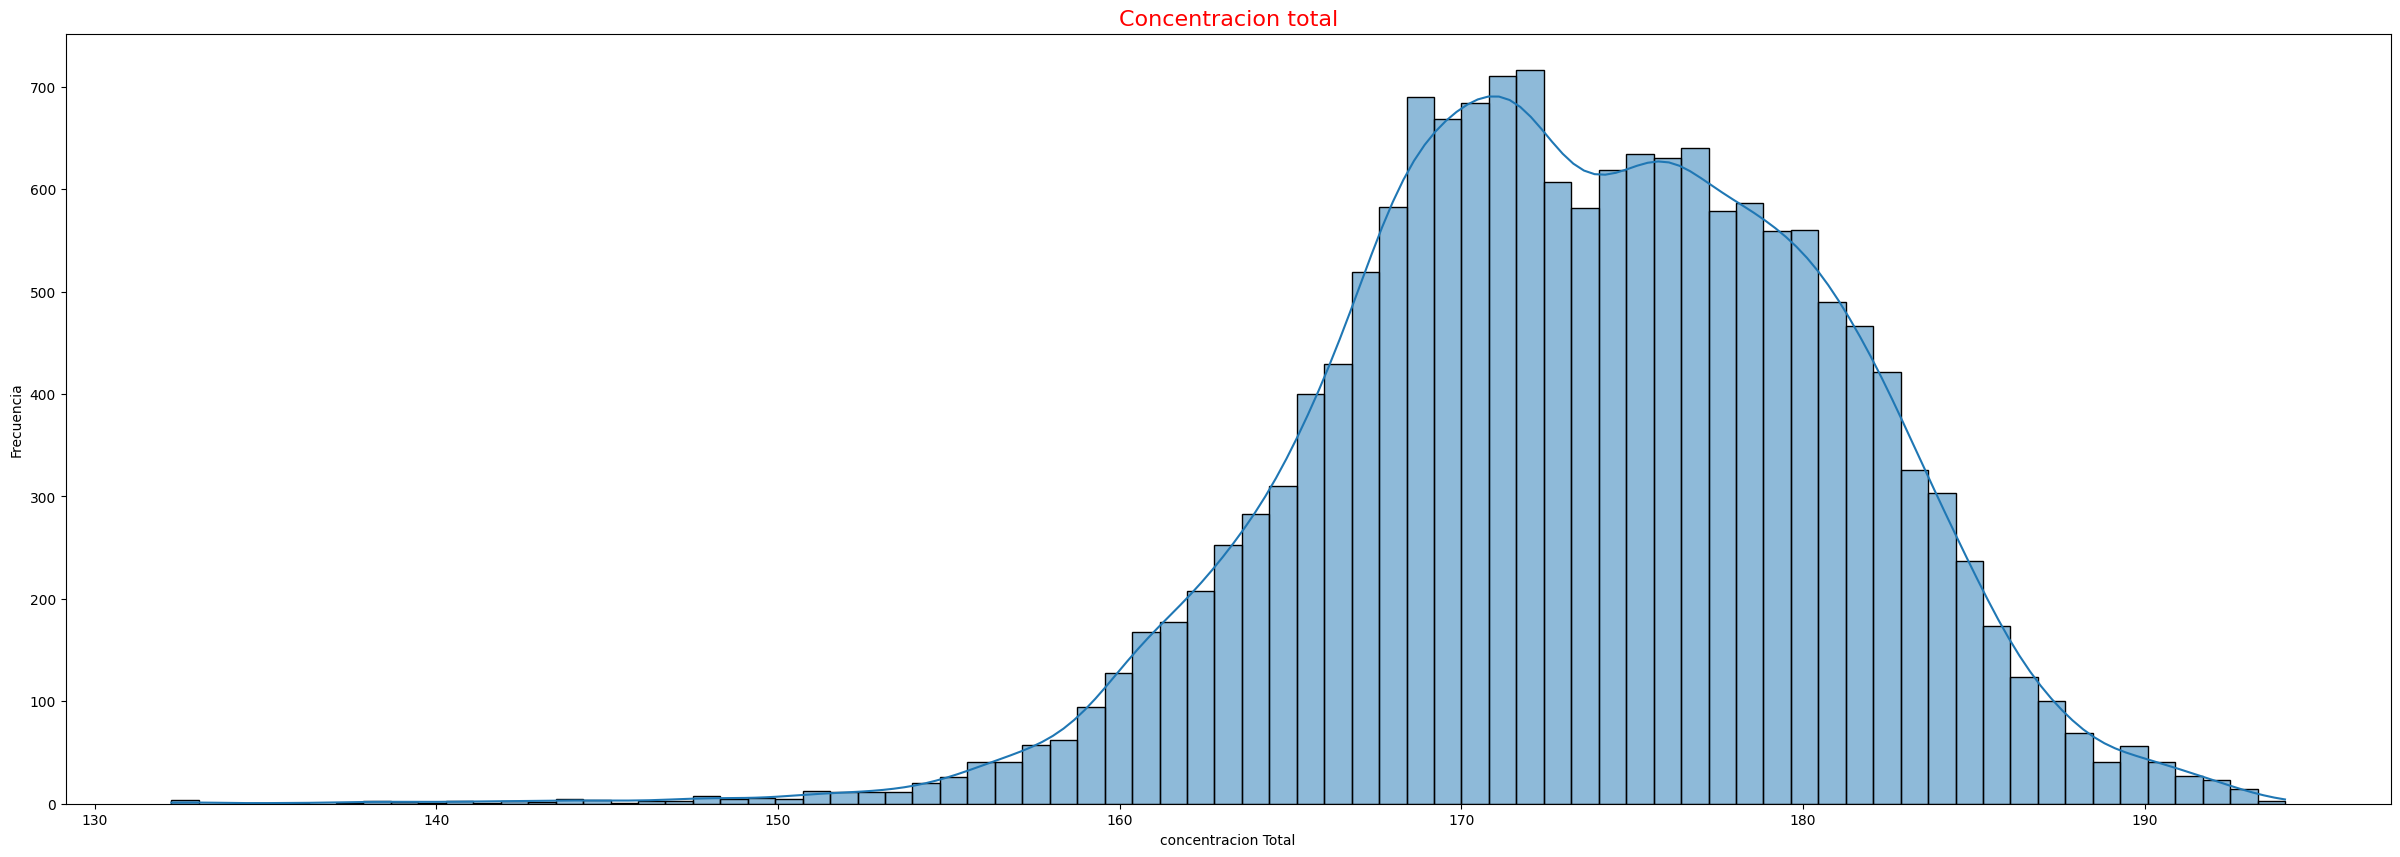

In [21]:
# Concentraciones totales

df_full['Concentracion_total'] = df_full['rougher.input.feed_au'] + df_full['rougher.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_au'] + df_full['final.output.concentrate_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['final.output.concentrate_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['final.output.concentrate_pb'] 



plt.figure(figsize = (30,10))
sns.histplot(df_full['Concentracion_total'], kde=True)
plt.xlabel('concentracion Total')
plt.ylabel('Frecuencia')
plt.title('Concentracion total', fontsize= 16, color= 'Red')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, correcto

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>
    
En base a los gráficos observados, filtra los valores que son outliers. Puedes usar el rango intercuartil para determinar qué valores son outliers.

</div> 

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Con el comentario de la revisión anterior me refería que remuevas los outliers de la data que se usará en los modelos. Puedes aplicar la misma función que creaste `remove_outliers_iqr` para remover los datos en la data de train que se usará para el entrenamiento y validación de los modelos.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v5</b> <a class="tocSkip"></a>

Excelente, bien hecho

</div>

## Construccion del modelo

In [22]:
target = ['rougher.output.recovery', 'final.output.recovery']

y_train = df_train[target].reset_index(drop=True)
x_train = df_train.drop(target, axis=1)
x_train = x_train.drop(['date'], axis=1)

In [23]:
#definicion funcion sMAPE

def SMAPE(y, y_pred):
    n = len(y)
    real = np.abs(y)
    pred = np.abs(y_pred)
    diff = np.abs(y - y_pred)
    denominator = (real + pred) / 2

    # Para evitar división por cero:
    smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100
    return smape

def smape_final(y, y_pred):
    # Si y e y_pred son arrays con 2 columnas
    y_rougher = y[:, 0]
    y_pred_rougher = y_pred[:, 0]

    y_final = y[:, 1]
    y_pred_final = y_pred[:, 1]

    smape_rougher = SMAPE(y_rougher, y_pred_rougher)
    smape_final = SMAPE(y_final, y_pred_final)

    return 0.25 * smape_rougher + 0.75 * smape_final

smape_scorer = make_scorer(smape_final, greater_is_better=False)
    

# Entrenamiento de diferentes modelos

In [24]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train.values, scoring=smape_scorer, cv=5)
linear_final_score = scores.mean()
print("sMAPE scores:", scores)
print('Modelo de regresion lineal - SMAPE = {:.6f}'.format(linear_final_score))

sMAPE scores: [-17.86800384 -13.05000993 -15.84610413 -20.683037   -17.39571145]
Modelo de regresion lineal - SMAPE = -16.968573


In [25]:
model = LinearRegression(n_jobs = 1000)
scores = cross_val_score(model, x_train, y_train.values, scoring=smape_scorer, cv=5)
linear_final_score = scores.mean()
print("sMAPE scores:", scores)
print('Modelo de regresion lineal - SMAPE = {:.6f}'.format(linear_final_score))

sMAPE scores: [-17.86800384 -13.05000993 -15.84610413 -20.683037   -17.39571145]
Modelo de regresion lineal - SMAPE = -16.968573


In [26]:
# DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=12345)
scores = cross_val_score(model, x_train, y_train.values, scoring=smape_scorer, cv=5)
linear_final_score = scores.mean()
print("sMAPE scores:", scores)
print('Modelo de regresion lineal - SMAPE = {:.6f}'.format(linear_final_score))

/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100
/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100
/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100
/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100


sMAPE scores: [-26.37215008 -30.04606224 -20.9275558  -25.90597159 -23.57558838]
Modelo de regresion lineal - SMAPE = -25.365466


In [27]:
# DecisionTreeRegressor con n iteraciones

def DecisionTree_fx(x_train, y_train, smape_scorer, iteraciones):
    for i in range(iteraciones):
        rand = random.randint(3, 8)
         
        model = DecisionTreeRegressor(random_state=12345, max_depth=rand)
        
        scores = cross_val_score(model, x_train, y_train.values, scoring=smape_scorer, cv=5)
        mean_score = scores.mean()
        
        print(f"Iteración {i+1}: max_depth = {rand} --> sMAPE promedio = {mean_score:.6f}")


DecisionTree_fx(x_train, y_train, smape_scorer, iteraciones=6)


Iteración 1: max_depth = 3 --> sMAPE promedio = -15.029288


/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100


Iteración 2: max_depth = 7 --> sMAPE promedio = -16.683282
Iteración 3: max_depth = 5 --> sMAPE promedio = -15.539327
Iteración 4: max_depth = 4 --> sMAPE promedio = -15.692813


/tmp/ipykernel_50/3460914688.py:11: RuntimeWarning: invalid value encountered in true_divide
  smape = np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100


Iteración 5: max_depth = 7 --> sMAPE promedio = -16.683282
Iteración 6: max_depth = 4 --> sMAPE promedio = -15.692813


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok, muy bien con probar diferentes valores de depth. Sin embargo, nota que todos los valores son muy grandes, lo cual causa que el smape sea el mismo. Está bien probar con valores aleatorios, pero dentro de un rango que sepamos que genera diferentes resultados. En este caso te recomiendo que intentes con valores más pequeños, desde 3 hasta 8.

</div>

In [28]:
# RandomForestRegressor
def evaluar_random_forests(x_train, y_train, smape_scorer, iteraciones):
    for i in range(iteraciones):
        # Elegir n_estimators aleatorio entre 1 y 1000
        n_estimators_random = random.randint(100, 1000)
        
        # Crear el modelo
        model = RandomForestRegressor(
            n_estimators=n_estimators_random,
            random_state=12345,
            n_jobs=-1  # Usar todos los núcleos para acelerar
        )
        
        # Evaluar el modelo
        scores = cross_val_score(model, x_train, y_train.values, scoring=smape_scorer, cv=5)
        mean_score = scores.mean()
        
        # Imprimir resultados
        print(f"Iteración {i+1}: n_estimators = {n_estimators_random} --> sMAPE promedio = {mean_score:.6f}")
        
        
evaluar_random_forests(x_train, y_train, smape_scorer, iteraciones=5)


Iteración 1: n_estimators = 828 --> sMAPE promedio = -16.338420
Iteración 2: n_estimators = 168 --> sMAPE promedio = -16.318452
Iteración 3: n_estimators = 725 --> sMAPE promedio = -16.339139
Iteración 4: n_estimators = 315 --> sMAPE promedio = -16.318058
Iteración 5: n_estimators = 656 --> sMAPE promedio = -16.322548


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

OK, muy bien con los valores probados para n_estimators

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>
    
Ok, muy bien con los modelos y el uso del scoring. Sin embargo, prueba con diferentes versiones de los modelos, por ejemplo, entrena y testea diferentes combinaciones de n_estimator y depth para random forest.

</div> 

**Analisis:**

el modelo que mejor tiene un SMAPE es el Random Forest, apesar que el tiempo y recursos necesarios para correr fueron mayores, tiene un resultado similar la regresion lineal, y ademas requiere de menores recursos lo que nos permite concluir que para el ejercicio la regresion se ajsuta mucho mejor que los demas modelos 

********
Actualizacion:

realizando varias iteracion y ajustando los parametros de los modelos, el modelo que mejor resultado tiene es el random forest regression tiene un menor sMAPE de -16,33 esto es importante mencionarlo, ya que para poder lograr este resultado los recursos computacionales fueron mayores, entre mayor iteraciones se realizaban y se ajustaba el modelo con mayor numero de estimaciones, la maquina s epuede saturar mas peor el resultado final mejora.  

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelentes conclusiones. Haces muy bien al incluir valores de las métricas muy importantes. Finalmente el tipo de modelo debe ser determinado no solamente por su desempeño sino que también por la velocidad de procesamiento requerida por el negocio
    
</div>